<a href="https://colab.research.google.com/github/Rahmatpratama90/three.js/blob/master/Practical_Classification_UI_Summer_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

data_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, names=col_names, delimiter=' *, *')
test_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=1, names=col_names, delimiter=' *, *')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [0]:
#split data_df into train_df and validation_df
train_df, val_df = train_test_split(data_df, test_size=0.3, stratify=data_df['class'])

In [0]:
train_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3121,21,Private,155066,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15099,63,Self-emp-not-inc,420629,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,45,United-States,<=50K
2470,50,Federal-gov,20179,Masters,14,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
18552,18,Private,210828,Some-college,10,Never-married,Handlers-cleaners,Own-child,Other,Male,0,0,30,United-States,<=50K
16786,22,Private,204935,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K


In [0]:
val_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
571,51,Private,95469,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
28218,33,Private,168981,1st-4th,2,Never-married,Sales,Own-child,White,Female,0,0,24,United-States,<=50K
13758,31,Self-emp-inc,344275,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,44,United-States,<=50K
30969,51,Private,305673,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Canada,>50K
6577,41,Local-gov,359259,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


In [0]:
test_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


# Part-1: Exploratory Data Analysis


## Attribute analysis
EDA yang akan kita lakukan pertama kali adalah mengidentifikasi tipe dari tiap attribut. Ada beberapa tipe atribut pada data yang kita gunakan yaitu:
  1. Atribut numerik
  2. Atribut kategorikal
  3. Atribut ordinal

Atribut numerik:
1. capital-gain,
2. capital loss,
3. hours-per-week,
4. age,
5. fnlgwt

Atribut kategorikal:
1. workclass,
2. relationship,
3. race,
4. sex,
5. native-country,
6. occupation,
7. marital-status
  
Atribut ordinal:
  1. education, 
  2. education-num,
  

In [0]:
index = train_df.index
columns = train_df.columns

columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [0]:
numeric_index = ['capital-gain', 'capital-loss', 'hours-per-week', 'age', 'fnlwgt']
ordinal_index = ['education', 'education-num']
numeric_data = train_df[['capital-gain', 'capital-loss', 'hours-per-week', 'age', 'fnlwgt']]
numeric_data.describe()

,capital-gain,capital-loss,hours-per-week,age,fnlwgt
count,22792.000000,22792.000000,22792.000000,22792.000000,2.279200e+04
mean,1045.187478,87.560372,40.481309,38.502194,1.894271e+05
std,7147.198609,402.595910,12.283204,13.605800,1.052304e+05
min,0.000000,0.000000,1.000000,17.000000,1.228500e+04
25%,0.000000,0.000000,40.000000,28.000000,1.178315e+05
50%,0.000000,0.000000,40.000000,37.000000,1.783840e+05
75%,0.000000,0.000000,45.000000,47.000000,2.363215e+05
max,99999.000000,4356.000000,99.000000,90.000000,1.484705e+06


In [0]:
categorical_data = train_df.drop(numeric_index + ordinal_index, axis=1)
categorical_data.describe()

,workclass,marital-status,occupation,relationship,race,sex,native-country,class
count,22792,22792,22792,22792,22792,22792,22792,22792
unique,9,7,15,6,5,2,41,2
top,Private,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,15917,10488,2892,9242,19466,15336,20395,17303


In [0]:
ordinal_data = train_df[ordinal_index]
train_df.loc[:, ['education-num']] = pd.Categorical(train_df['education-num'])
ordinal_data.describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,education-num
count,22792.000000
mean,10.078405
std,2.560632
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


## Univariate Analysis

### Univariate Data Analysis untuk atribut numeric

Hal yang dapat dilihat:
1.   Apakah simetris
2.   Apakah skew atau condong ke arah tertentu
3. Minimum dan maksimum
4. Apakah range data tertentu yang sangat mencolok
5. Apakah ada outlier

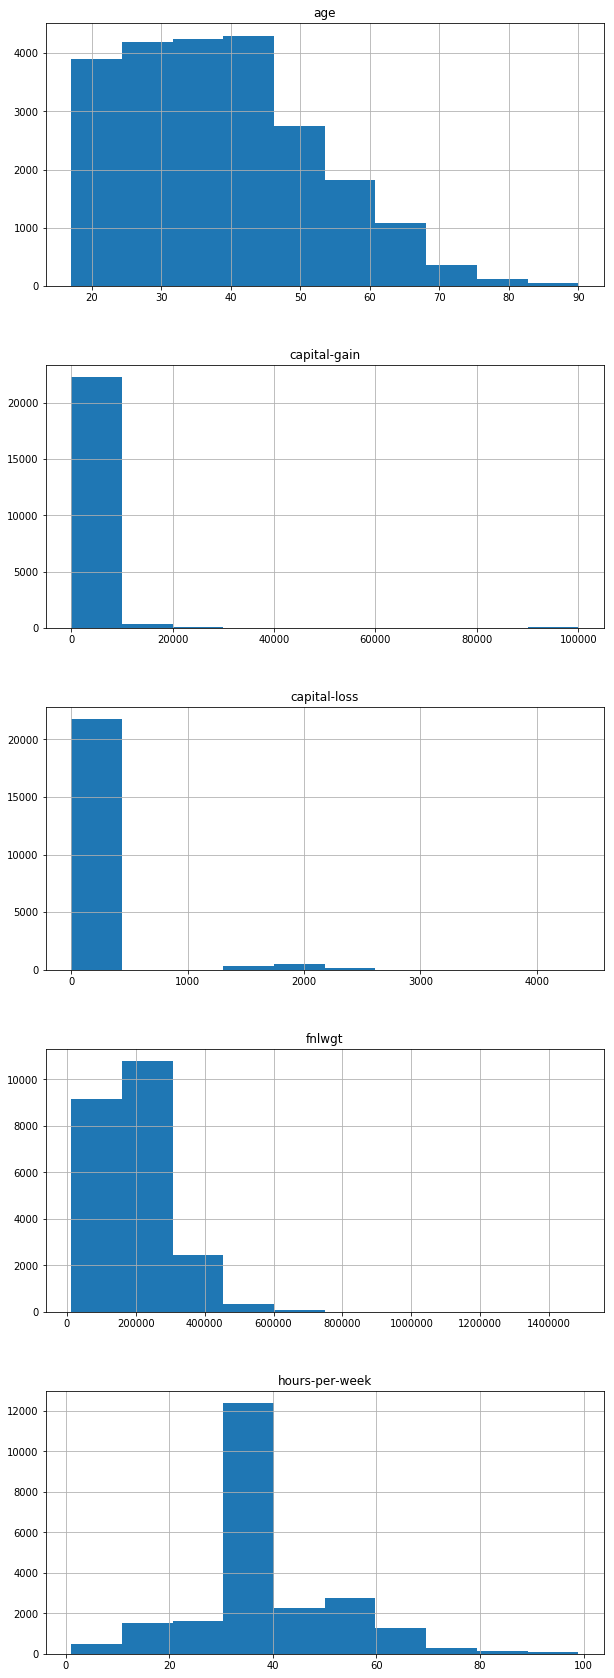

In [0]:
train_df.hist(column=numeric_index, figsize=(10,30), layout=(5,1))
plt.show()

### Univariate Data Analysis untuk atribut kategorikal

Hal yang perlu diperhatikan:
1. Jumlah nilai yang unik
2. Balance tidaknya persebaran nilai dalam suatu atribut kategorikal
3. Kategori yang dominan



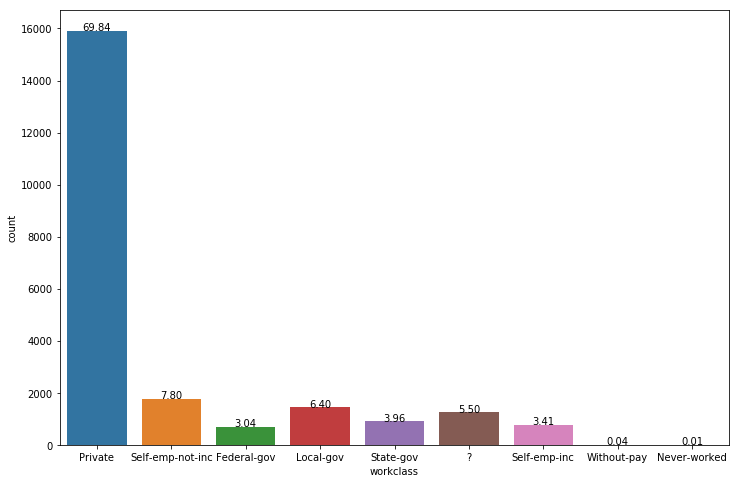

In [0]:
plt.figure(figsize=(12,8))

total = float(len(train_df["class"]) )
ax = sns.countplot(x="workclass", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

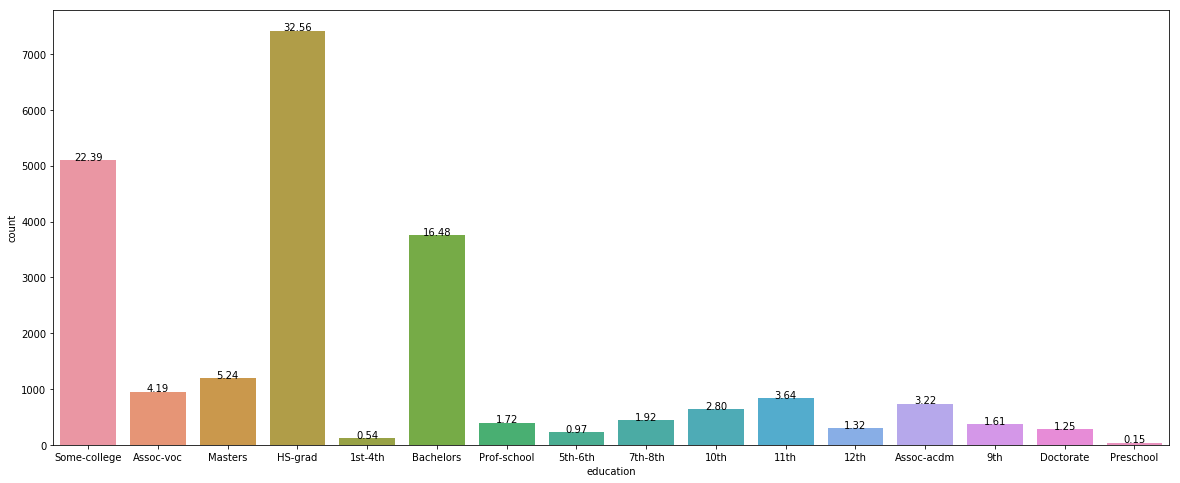

In [0]:
plt.figure(figsize=(20,8))
total = float(len(train_df["class"]))

ax = sns.countplot(x="education", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

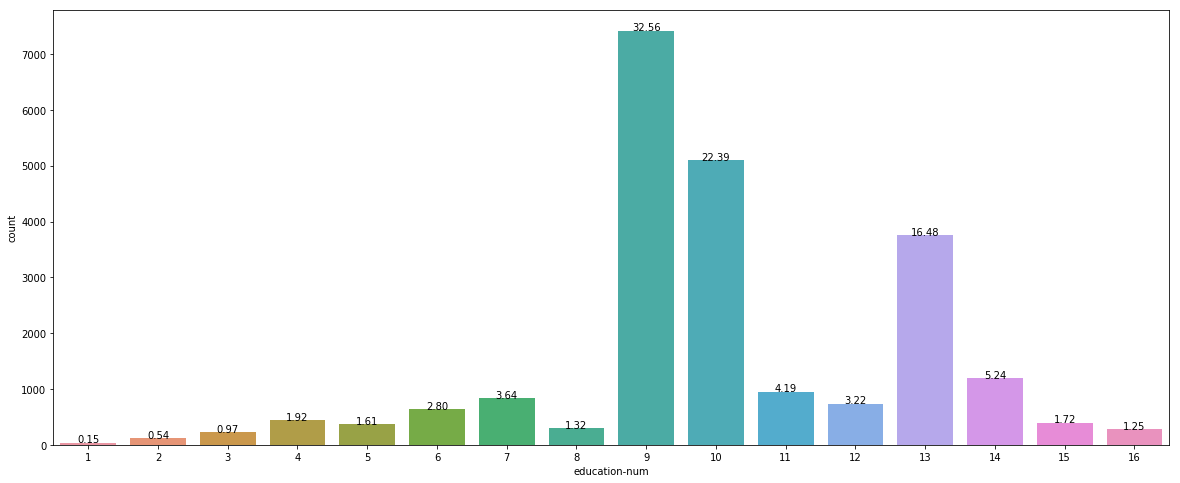

In [0]:
plt.figure(figsize=(20,8))
total = float(len(train_df["class"]))

ax = sns.countplot(x="education-num", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Dari hasil visualisasi bisa diketahui bahwa education dan education-num memiliki distribusi yang sama persis tetapi pada eduaction-num memiliki urutan yang dilakukan berdasarkan jenjang pendidikan. Semakin tinggi jenjang pendidikan semakin besar education-num yang mewakilinya.

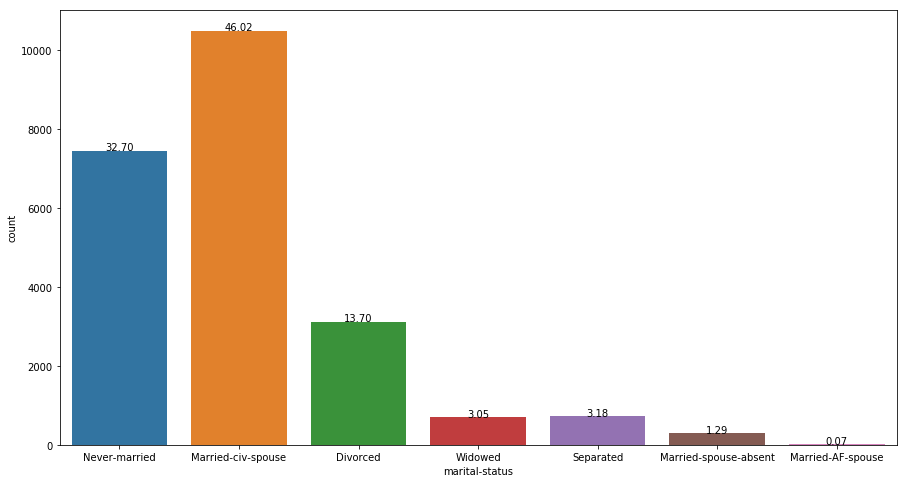

In [0]:
plt.figure(figsize=(15,8))
total = float(len(train_df))

ax = sns.countplot(x="marital-status", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


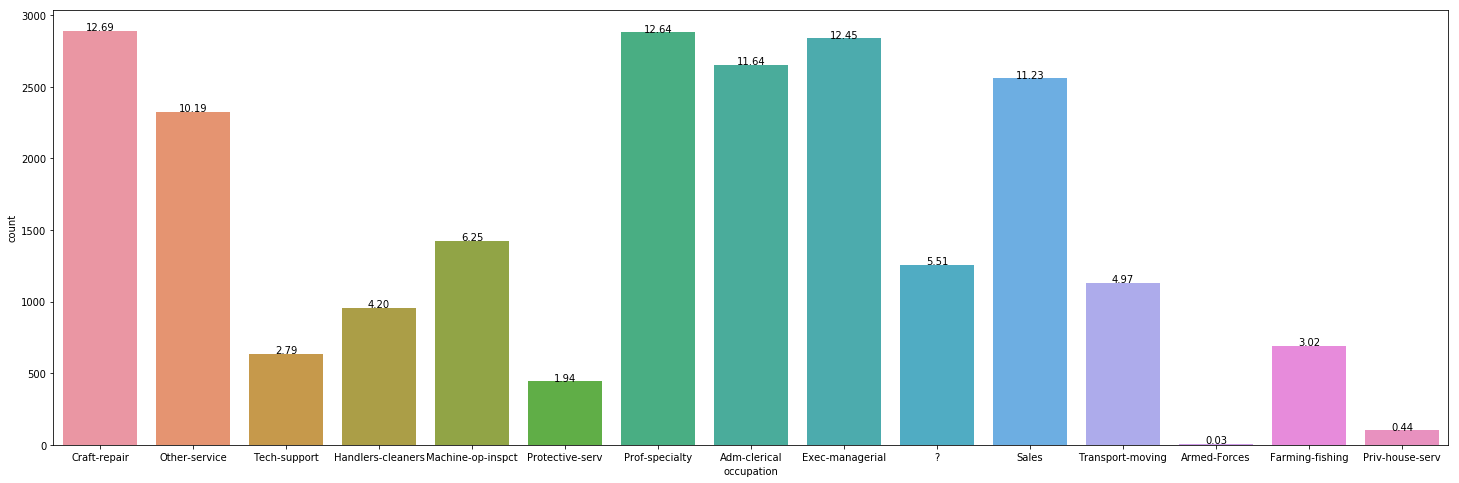

In [0]:
plt.figure(figsize=(25,8))
total = float(len(train_df) )

ax = sns.countplot(x="occupation", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

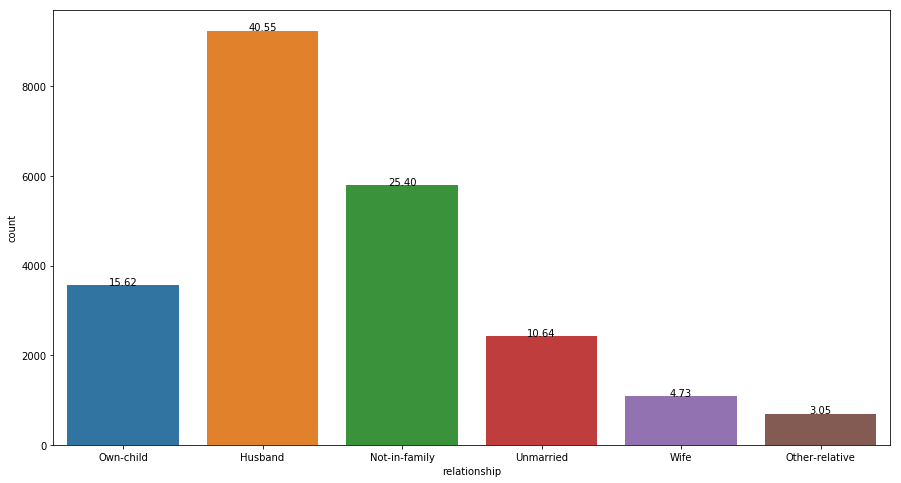

In [0]:
plt.figure(figsize=(15,8))
total = float(len(train_df) )

ax = sns.countplot(x="relationship", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

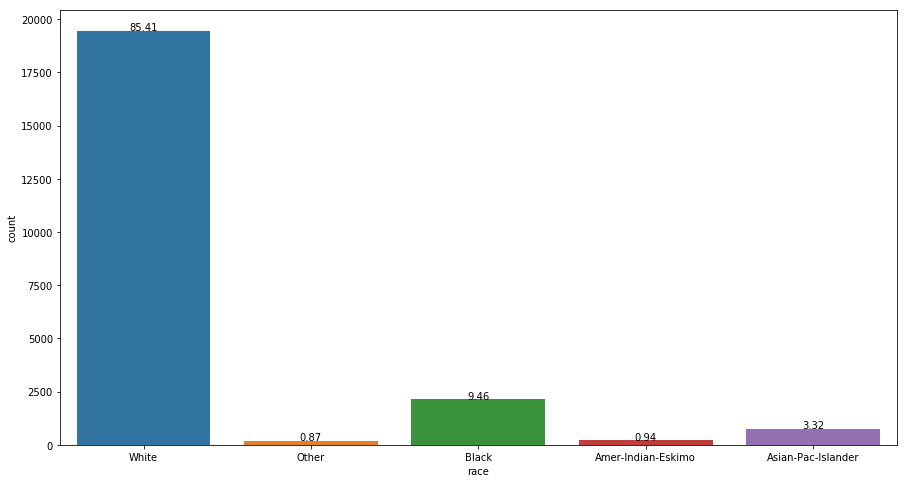

In [0]:
plt.figure(figsize=(15,8))
total = float(len(train_df) )

ax = sns.countplot(x="race", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

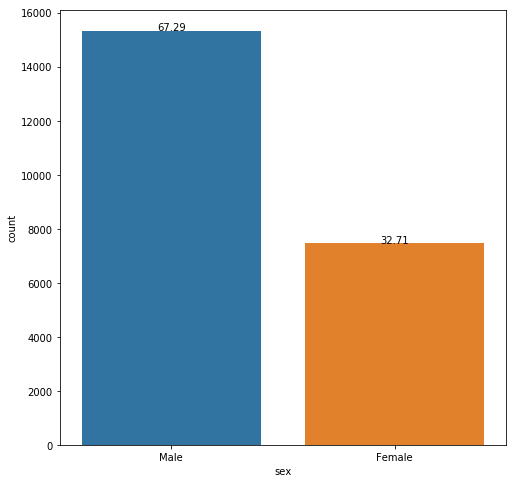

In [0]:
plt.figure(figsize=(8,8))
total = float(len(train_df) )

ax = sns.countplot(x="sex", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

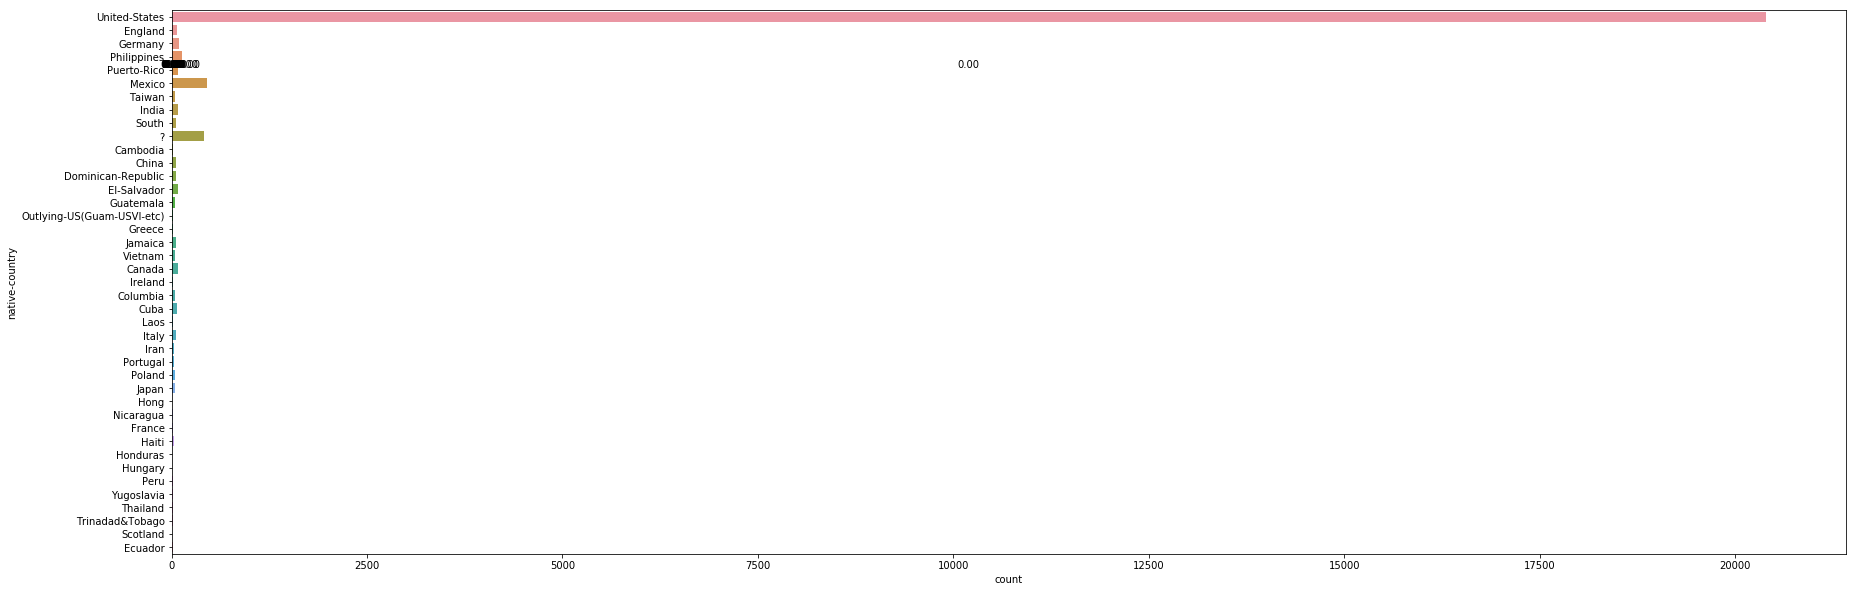

In [0]:
plt.figure(figsize=(30,10))
total = float(len(train_df))

ax = sns.countplot(y="native-country", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*120),
            ha="center") 
plt.show()

### Distribusi Label

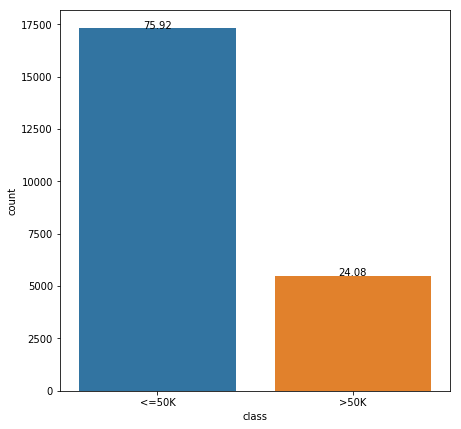

In [0]:
plt.figure(figsize=(7,7))
total = float(len(train_df) )

ax = sns.countplot(x="class", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## Bivariate Analysis

Mencari hubungan antara 2 atribut atau antara atribut dengan label

### Analisis hubungan antara suatu atribut dengan label

1. Plot relasi antara atribut dengan label
(bisa dalam bentuk boxplot atau countplot)
2. Melakukan tes hipotesa terhadap hubungan antara atribut dengan label

Tahapan melakukan tes hipotesis:
1. Tetapkan hipotesis nol (H0) dan hipotesis alternatif (H1), pada umumnya hipotesis nol mengklaim bahwa 2 populasi yang dites tidak berbeda secara *statistically significant*. Hipotesis alternatif mengklaim sebaliknya
2. Lakukan tes statistik yang sesuai
3. Apabila H0 gagal ditolak maka dapat kita simpulkan atribut yang dites tidak memiliki kontribusi untuk dapat melakukan klasifikasi. Sebaliknya apabila H0 ditolak berarti dapat kita simpulkan atribut tersebut memiliki kontribusi untuk melakukan klasifikasi

### Contoh tes terhadap data numerik

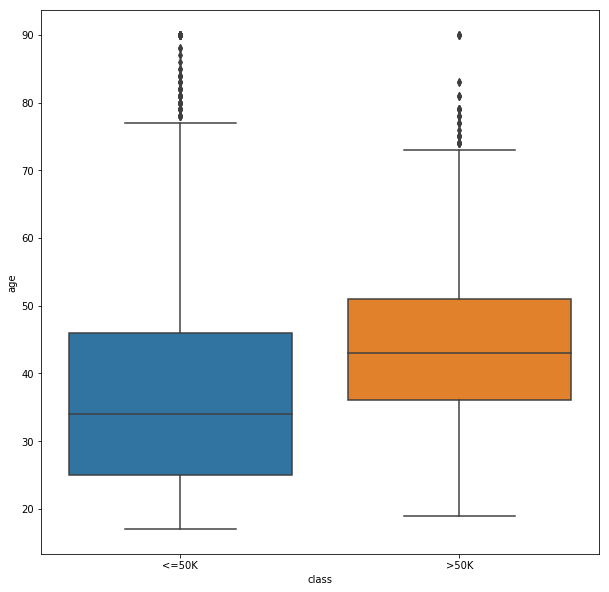

In [0]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="class", y="age", data=train_df)
plt.show()

In [0]:
train_df[['class', 'age']].groupby(['class'], as_index=False).mean().sort_values(by='age', ascending=False)

,class,age
1,>50K,44.191292
0,<=50K,36.697451


In [0]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

train_df = train_df[(np.abs(stats.zscore(train_df["age"])) < 3)] 

income_1 = train_df[train_df['class']=="<=50K"]['age']
income_0 = train_df[train_df['class']==">50K"]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject the null hypothesis")
else:
    print("we accept the null hypothesis")


ttest -4.2342963635367195
p value 3.546035779591652e-05
we reject the null hypothesis


Karena H0 ditolak, atribut `age` terbukti memiliki kontribusi untuk melakukan klasifikasi

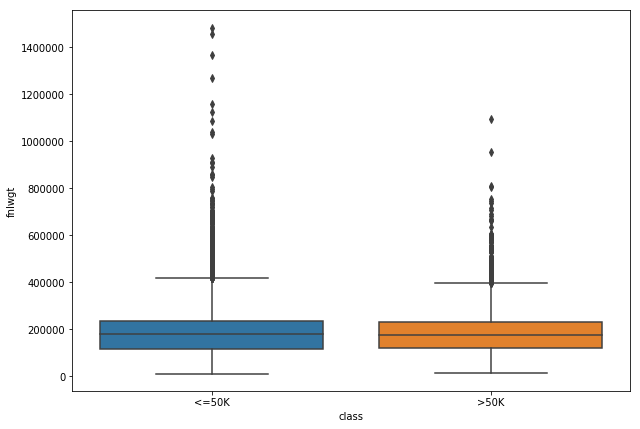

In [0]:
plt.figure(figsize=(10,7))
sns.boxplot(x="class", y="fnlwgt", data=train_df)
plt.show()

In [0]:
train_df = train_df[(np.abs(stats.zscore(train_df["fnlwgt"])) < 3)] 

income_1 = train_df[train_df['class']=="<=50K"]["fnlwgt"]
income_0 = train_df[train_df['class']==">50K"]["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")

ttest 0.8722096308155627
p-value 0.38417783885295487
we fail to reject the null hypothesis


Karena H0 gagal ditolak, tidak terbukti bahwa atribut `fnlwgt` memiliki kontribusi yang signifikan untuk melakukan klasifikasi


### Contoh tes terhadap atribut kategorikal

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


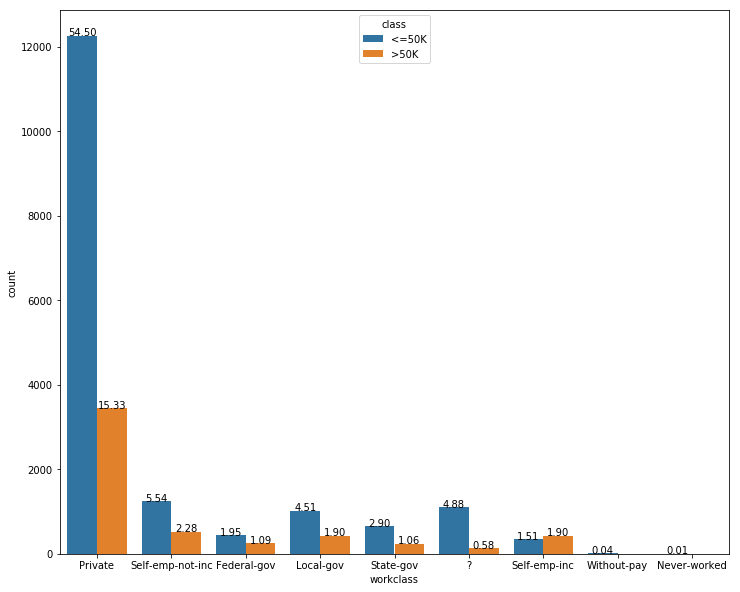

In [0]:
plt.figure(figsize=(12,10))
total = float(len(train_df["class"]) )

ax = sns.countplot(x="workclass", hue="class", data=train_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

**Chi-square test of independence**

Chi-square test of independence digunakan untuk menentukan apakah terdapat hubungan yang signifikan antara dua variabel kategorikal.



In [0]:
# contingency table
c_t = pd.crosstab(train_df['workclass'], train_df['class'], margins = False) 
c_t

class,<=50K,>50K
workclass,,
?,1097,130
Federal-gov,439,245
Local-gov,1014,426
Never-worked,3,0
Private,12247,3444
Self-emp-inc,340,428
Self-emp-not-inc,1245,513
State-gov,651,239
Without-pay,9,0


Contingency table, oleh Kark Pearson bertujuan untuk membantu menentukan variabel kontingen atau yang bergantung terhadap variabel lain.

Akan sulit menentukan hal ini hanya dari tabel, namun kita dapat menggunakan tes statistik *Pearson's Chi-Squared test*

```
If Statistic >= Critical Value: significant result, reject the null hypothesis (H0), dependent.
If Statistic < Critical Value: not significant result, fail to reject the null hypothesis (H0), independent.
```

Pada kasus ini:


*   H0 = tidak ada relasi antara atribut workclass dan label
*   H1 = ada relasi antara atribut workclass dengan label/class





In [0]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.99
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=8
p_value 2.108341982862079e-143
[[9.30761682e+02 2.96238318e+02]
 [5.18859813e+02 1.65140187e+02]
 [1.09233645e+03 3.47663551e+02]
 [2.27570093e+00 7.24299065e-01]
 [1.19026745e+04 3.78832555e+03]
 [5.82579439e+02 1.85420561e+02]
 [1.33356075e+03 4.24439252e+02]
 [6.75124611e+02 2.14875389e+02]
 [6.82710280e+00 2.17289720e+00]]
probability=0.990, critical=20.090, stat=688.530
Dependent (reject H0)


Karena hasil tes statistik menolak H0, dapat disimpulkan bahwa terdapat relasi antara atribut `workclass` dan `label`

## Multivariate Relationship

### Korelasi antara atribut numerik



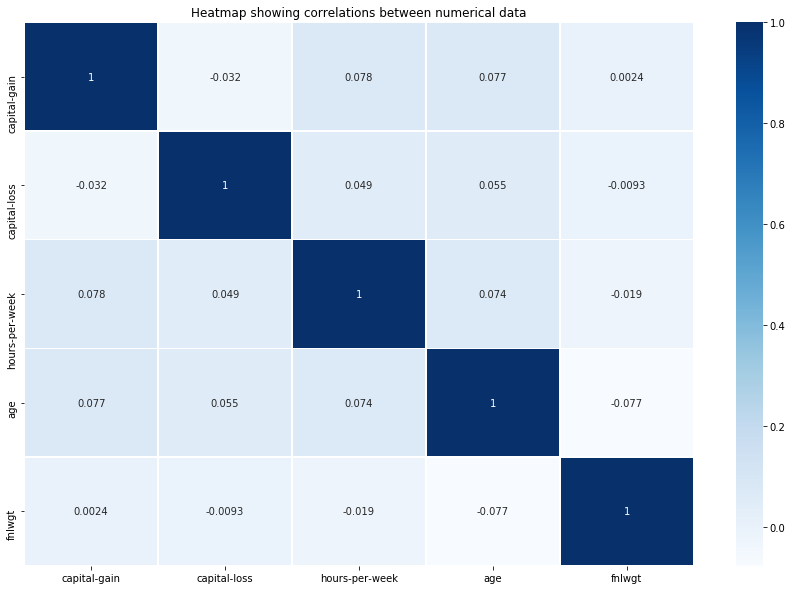

In [0]:
plt.figure(figsize=(15,10))  
sns.heatmap(numeric_data.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

### Multivariate analysis using boxplot

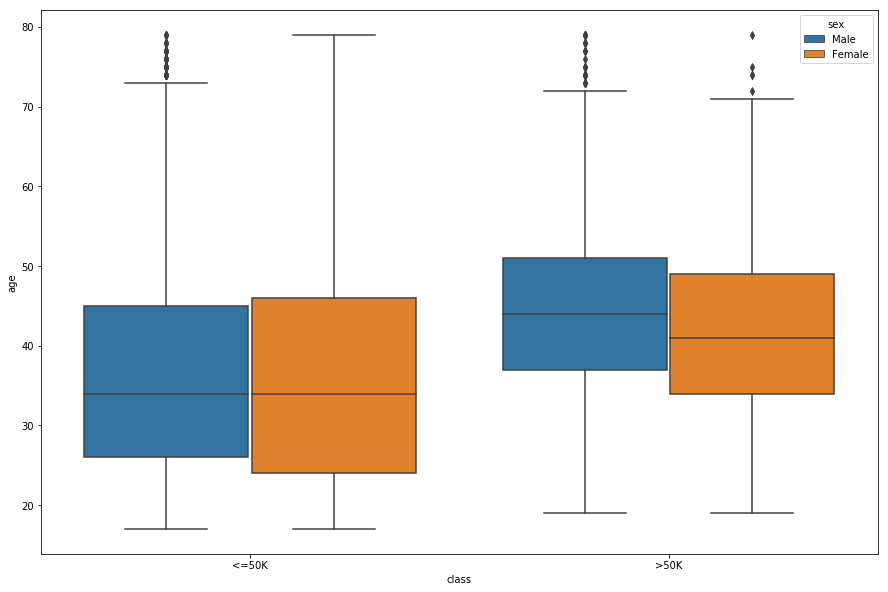

In [0]:
plt.figure(figsize=(15,10))
sns.boxplot(x="class", y="age",hue="sex",data=train_df)
plt.show()

## Capital Columns

True     20605
False     1865
Name: capital-gain, dtype: int64
True     21411
False     1059
Name: capital-loss, dtype: int64


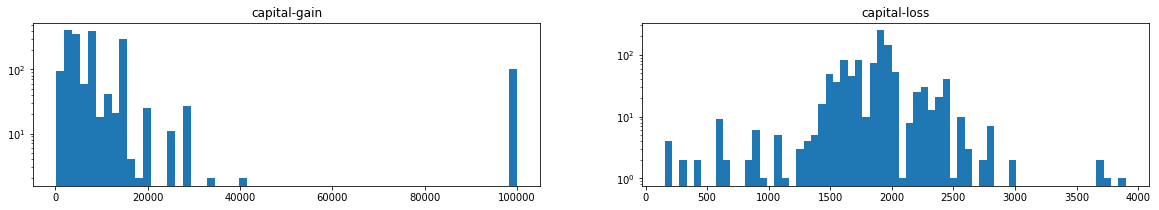

In [0]:
capital_columns = ['capital-gain', 'capital-loss']

#melihat jumlah data yang bernilai 0 dan bernilai selain 0
for col in capital_columns:
  data = train_df[col]
  binary_data = data.map(lambda x: x == 0)
  print(binary_data.value_counts())
  
#plot distribusi nilai data yang bernilai selain 0
fig, ax = plt.subplots(1, 2, figsize=(20,3))
for i, col in enumerate(capital_columns):
  data = train_df[col]
  non_zero_data = data[data != 0]
  ax[i].set_title(col)
  ax[i].hist(non_zero_data, bins='auto', log=True)


1. Mayoritas nilai kolom `capital-gain` dan `capital-loss` bernilai 0
2. Dari histogram, dapat dilihat distribusi nilai data terkonsentrasi pada rentang:
    - `capital-gain`: 1 - 20000
    - `capital-loss`: 1500 - 2500
3. Informasi di atas dapat dimanfaatkan untuk menentukan batas-batas bin yang sesuai

# Part-2: Preprocessing & Feature Engineering

Berdasarkan hasil **EDA**, kita dapat melakukan tahap selanjutnya, yaitu **Preprocessing & Feature Engineering**. Berikut adalah tahap2 yang akan dilakukan:
1. Membuang kolom yang tidak digunakan
2. Mengisi Missing Values
3. One-Hot Encoding terhadap atribut yang memiliki 2 nilai
4. Mengelompokkan nilai-nilai atribut kategorikal
5. One-Hot Encoding terhadap atribut yang memiliki nilai lebih dari 2
6. Standardisasi
7. Binning terhadap atribut numerik

## 1. Drop Columns

In [0]:
dropped_cols = ['fnlwgt', 'education']
prep_train_df = train_df.drop(dropped_cols, axis=1)
prep_train_df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3121,21,Private,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15099,63,Self-emp-not-inc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,45,United-States,<=50K
2470,50,Federal-gov,14,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
18552,18,Private,10,Never-married,Handlers-cleaners,Own-child,Other,Male,0,0,30,United-States,<=50K
16786,22,Private,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K


## 2. Missing Values Imputation

In [0]:
def impute_missing_values_with_mode(df: DataFrame, col_mode_pairs: [(str, str)]):
  result_df = df.copy()
  new_col_mode_pairs = []
  
  for col_name, mode_value in col_mode_pairs:
    if not mode_value:
      mode_value = result_df[col_name].mode()[0]
    
    result_df[col_name] = result_df[col_name].replace('?', mode_value)
    new_col_mode_pairs.append((col_name, mode_value))
    
  return result_df, new_col_mode_pairs

In [0]:
col_mode_pairs = [('workclass', None), ('occupation', None), ('native-country', None)]
prep_train_df, new_col_mode_pairs = impute_missing_values_with_mode(prep_train_df, col_mode_pairs)

In [0]:
for col, _ in new_col_mode_pairs:
  print("The number of missing values in {}: {}".format(col, len(prep_train_df[prep_train_df[col] == '?'])))

The number of missing values in workclass: 0
The number of missing values in occupation: 0
The number of missing values in native-country: 0


## 3. One-Hot **Encoding** for Two-Valued Attributes

In [0]:
def encode_two_valued_attributes_with_one_hot_encoding(
    df: DataFrame, col_pos_val_pairs: [(str, str)]
):
  result_df = df.copy()
  for col_name, pos_value in col_pos_val_pairs:
    result_df[col_name] = np.where(result_df[col_name] == pos_value, 1, 0)
    
  return result_df

In [0]:
col_pos_val_pairs = [('sex', 'Male'), ('class', '>50K')]
prep_train_df = encode_two_valued_attributes_with_one_hot_encoding(prep_train_df, col_pos_val_pairs)

prep_train_df.head(8)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3121,21,Private,10,Never-married,Craft-repair,Own-child,White,1,0,0,40,United-States,0
15099,63,Self-emp-not-inc,11,Married-civ-spouse,Other-service,Husband,White,1,0,0,45,United-States,0
2470,50,Federal-gov,14,Married-civ-spouse,Tech-support,Husband,White,1,0,0,40,United-States,1
18552,18,Private,10,Never-married,Handlers-cleaners,Own-child,Other,1,0,0,30,United-States,0
16786,22,Private,9,Never-married,Machine-op-inspct,Own-child,White,1,0,0,40,United-States,0
30857,59,Private,2,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,0
28624,26,Local-gov,10,Never-married,Protective-serv,Own-child,White,1,0,0,40,United-States,0
9110,49,Private,13,Never-married,Prof-specialty,Not-in-family,White,0,0,0,40,United-States,0


## 4. Map Categorical Values

In [0]:
def map_categorical_values(df: DataFrame, col_map_pairs: [(str, dict)]):
    result_df = df.copy()
    for col, map_ in col_map_pairs:
      result_df[col] = result_df[col].map(map_)
      
    return result_df

In [0]:
col_map_pairs = [
    (
        'marital-status', {
            'Married-civ-spouse': 'Couple', 
            'Divorced': 'Single',
            'Never-married': 'Single',
            'Separated': 'Single', 
            'Widowed': 'Single',
            'Married-spouse-absent': 'Single',
            'Married-AF-spouse': 'Couple'
        }
    ),
    (
        'native-country', {
          'United-States': 'United-States', 
          'Cambodia': 'Southeast-Asia', 
          'England': 'Europe', 
          'Puerto-Rico': 'America-Non-US', 
          'Canada': 'Canada', 
          'Germany': 'Europe',
          'Outlying-US(Guam-USVI-etc)': 'America-Non-US', 
          'India': 'Asia', 
          'Japan': 'Asia', 
          'Greece': 'Europe', 
          'South': 'Asia', 
          'China': 'Asia', 
          'Cuba': 'America-Non-US', 
          'Iran': 'Asia', 
          'Honduras': 'America-Non-US', 
          'Philippines': 'Southeast-Asia', 
          'Italy': 'Europe', 
          'Poland': 'Europe', 
          'Jamaica': 'America-Non-US', 
          'Vietnam': 'Southeast-Asia', 
          'Mexico': 'America-Non-US', 
          'Portugal': 'Europe', 
          'Ireland': 'Europe', 
          'France': 'Europe', 
          'Dominican-Republic': 'America-Non-US', 
          'Laos': 'Southeast-Asia', 
          'Ecuador': 'America-Non-US', 
          'Taiwan': 'Asia', 
          'Haiti': 'America-Non-US', 
          'Columbia': 'America-Non-US', 
          'Hungary': 'Europe',
          'Guatemala': 'America-Non-US', 
          'Nicaragua': 'America-Non-US', 
          'Scotland': 'Europe', 
          'Thailand': 'Southeast-Asia', 
          'Yugoslavia': 'Europe', 
          'El-Salvador': 'America-Non-US', 
          'Trinadad&Tobago': 'America-Non-US', 
          'Peru': 'America-Non-US', 
          'Hong': 'Asia', 
          'Holand-Netherlands': 'Europe'
      }
    )
]
prep_train_df = map_categorical_values(prep_train_df, col_map_pairs)

In [0]:
for col, _ in col_map_pairs:
  print("Unique values of {}: {}".format(col, prep_train_df[col].unique()))

Unique values of marital-status: ['Single' 'Couple']
Unique values of native-country: ['United-States' 'Europe' 'Southeast-Asia' 'America-Non-US' 'Asia'
 'Canada']


## 5. One-Hot Encoding for Multivalued Attributes

In [0]:
def encode_multivalued_attributes_with_one_hot_encoding(
    df: DataFrame, col_names: [str]
):
  result_df = df.copy()
  for col_name in col_names:
    one_hot_values_df = pd.get_dummies(result_df[col_name], prefix=col_name)
    result_df = pd.concat([result_df, one_hot_values_df], axis=1)
    result_df = result_df.drop(col_name, axis=1)
    
  return result_df

In [0]:
one_hot_cols = ['workclass', 'occupation', 'relationship', 'race', 'marital-status', 'native-country']
prep_train_df = encode_multivalued_attributes_with_one_hot_encoding(prep_train_df, one_hot_cols)

prep_train_df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital-status_Couple,marital-status_Single,native-country_America-Non-US,native-country_Asia,native-country_Canada,native-country_Europe,native-country_Southeast-Asia,native-country_United-States
3121,21,10,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
15099,63,11,1,0,0,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2470,50,14,1,0,0,40,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
18552,18,10,1,0,0,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
16786,22,9,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


## 6. Standardization

In [0]:
def standardize_attributes(df: DataFrame, col_names: [str], scaler: StandardScaler = None):
  result_df = df.copy()
  
  if not scaler:
    scaler = StandardScaler()
    scaler.fit(result_df[col_names])
  
  result_df[col_names] = scaler.transform(result_df[col_names])    
  
  return result_df, scaler

In [0]:
standardized_cols = ['age', 'hours-per-week']
prep_train_df, new_scaler = standardize_attributes(prep_train_df, standardized_cols)

prep_train_df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital-status_Couple,marital-status_Single,native-country_America-Non-US,native-country_Asia,native-country_Canada,native-country_Europe,native-country_Southeast-Asia,native-country_United-States
3121,-1.301969,10,1,0,0,-0.042457,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
15099,1.848732,11,1,0,0,0.366249,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2470,0.873515,14,1,0,0,-0.042457,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
18552,-1.527019,10,1,0,0,-0.859868,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
16786,-1.226952,9,1,0,0,-0.042457,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


## 7. Bin Numerical Attributes




In [0]:
def _map_value_to_bin(value: int, bin_thresholds: [float]):
  count = 0
  
  for threshold in bin_thresholds:
    if value < threshold:
      return count
    else:
      count += 1
    

def bin_numerical_attributes(df: DataFrame, col_bin_pairs: [(str, [float])] ):
    result_df = df.copy()
    for col, bin_thresholds in col_bin_pairs:
      result_df[col] = result_df[col].apply(lambda val: _map_value_to_bin(val, bin_thresholds))
    
    return result_df

In [0]:
bin_capital_gain = [0.0, 1.0, 3000.0, 5000.0, 10000.0, 20000.0, float('inf')] 
bin_capital_loss = [0.0, 1.0, 1700, 1900.0, 2000, float('inf')]

col_bin_pairs = [('capital-gain', bin_capital_gain), ('capital-loss', bin_capital_loss)]

prep_train_df = bin_numerical_attributes(prep_train_df, col_bin_pairs)

prep_train_df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital-status_Couple,marital-status_Single,native-country_America-Non-US,native-country_Asia,native-country_Canada,native-country_Europe,native-country_Southeast-Asia,native-country_United-States
3121,-1.301969,10,1,1,1,-0.042457,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
15099,1.848732,11,1,1,1,0.366249,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2470,0.873515,14,1,1,1,-0.042457,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
18552,-1.527019,10,1,1,1,-0.859868,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
16786,-1.226952,9,1,1,1,-0.042457,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


# Part 3: Model Training

Pada bagian ini, berikut hal-hal yang akan kita lakukan:
1. Mengevaluasi performance beberapa model (memiliki nilai hyperparameter default) terhadap data benchmark
2. Mengevaluasi performance beberapa model (memiliki nilai hyperparameter default) terhadap data hasil preprocessing Part 2


In [0]:
val_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
571,51,Private,95469,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
28218,33,Private,168981,1st-4th,2,Never-married,Sales,Own-child,White,Female,0,0,24,United-States,<=50K
13758,31,Self-emp-inc,344275,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,44,United-States,<=50K
30969,51,Private,305673,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Canada,>50K
6577,41,Local-gov,359259,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


In [0]:
print("Number of rows: {}".format(len(val_df)))

Number of rows: 9769


## 1. Benchmark Performance

Data benchmark yang digunakan adalah data awal dengan seluruh atribut kategorikal diubah menggunakan One-Hot Encoding

In [0]:
def preprocess_benchmark_data(
        df: DataFrame,
        col_pos_val_pairs: [(str, str)],
        one_hot_cols: [str]
):
    result_df = df.copy()
    result_df = encode_two_valued_attributes_with_one_hot_encoding(result_df, col_pos_val_pairs)
    result_df = encode_multivalued_attributes_with_one_hot_encoding(result_df, one_hot_cols)
    
    return result_df

In [0]:
bm_col_pos_val_pairs = [('class', '>50K')]
bm_one_hot_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


bm_train_df = preprocess_benchmark_data(train_df, bm_col_pos_val_pairs, bm_one_hot_cols)
bm_val_df = preprocess_benchmark_data(val_df, bm_col_pos_val_pairs, bm_one_hot_cols)

bm_train_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,...,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
3121,21,155066,10,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15099,63,420629,11,0,0,45,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2470,50,20179,14,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18552,18,210828,10,0,0,30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16786,22,204935,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
bm_val_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
571,51,95469,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28218,33,168981,2,0,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13758,31,344275,9,0,0,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30969,51,305673,11,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6577,41,359259,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
def validate_one_hot_cols(df1: DataFrame, df2: DataFrame):  
  print("Number of initial columns in df1: {}".format(len(df1.columns)))  
  print("Number of initial columns in df2: {}".format(len(df2.columns)))

  res_df1 = df1.copy()
  res_df2 = df2.copy()

  diff_1_2 = set(res_df1.columns) - set(res_df2.columns)
  
  if diff_1_2:
    print("\nExtra cols in df1:")
    for extra_col in diff_1_2:
      res_df2[extra_col] = 0
      print(extra_col)
  
  diff_2_1 = set(res_df2.columns) - set(res_df1.columns)
  
  if diff_2_1:
    print("\nExtra cols in df1:")
    for extra_col in diff_2_1:
      res_df1[extra_col] = 0
      print(extra_col)
      
  print("\nNumber of final columns in df1: {}".format(len(res_df1.columns)))  
  print("Number of final columns in df2: {}".format(len(res_df2.columns)))
  
  return res_df1, res_df2

In [0]:
bm_train_df, bm_val_df = validate_one_hot_cols(bm_train_df, bm_val_df)

Number of initial columns in df1: 108
Number of initial columns in df2: 109

Extra cols in df1:
native-country_Holand-Netherlands

Number of final columns in df1: 109
Number of final columns in df2: 109


In [0]:
def separate_data_and_label(df: DataFrame):
  features = set(df.columns) - set('class')

  data_df = df[list(features)]
  label = df['class']
  
  return data_df, label

In [0]:
bm_train_df, bm_train_label = separate_data_and_label(bm_train_df)
bm_val_df, bm_val_label = separate_data_and_label(bm_val_df)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(solver='saga')),
    ('K-Nearest Neighbours', KNeighborsClassifier()),
    ('SVM', SVC(gamma='scale')),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
]

In [0]:
eval_result_template = (
"""
=================================================================
{model_name}

Confusion Matrix (True Class VS Predicted Class)
{conf_matrix}

Accuracy  : {acc}
Precision : {precision}
Recall    : {recall}
F1-Score  : {f1}
"""
)

In [0]:
def evaluate_prediction(
    label: pd.Series, prediction: pd.Series, model_name: str, eval_result_template: str = eval_result_template
):
  conf_matrix = confusion_matrix(label, prediction)
  acc = accuracy_score(label, prediction)
  precision, recall, f1, _ = precision_recall_fscore_support(label, prediction)
  
  print(eval_result_template.format(
    model_name=model_name,
    conf_matrix=conf_matrix,
      acc =acc,
      precision=precision,
      recall=recall,
      f1=f1
  ))  

In [0]:
def evaluate_model(model_name: str, model: object, train_df: DataFrame, train_label: pd.Series, test_df: DataFrame, test_label: pd.Series):
  model.fit(train_df, train_label)
  prediction = model.predict(test_df)
  
  evaluate_prediction(test_label, prediction, model_name)
  

In [0]:
def evaluate_models(models: [object], train_df: DataFrame, train_label: pd.Series, test_df: DataFrame, test_label: pd.Series):
  for model_name, model in models:
    evaluate_model(model_name, model, train_df, train_label, test_df, test_label)

In [0]:
evaluate_models(models, bm_train_df, bm_train_label, bm_val_df, bm_val_label)


Naive Bayes

Confusion Matrix (True Class VS Predicted Class)
[[7044  373]
 [1608  744]]

Accuracy  : 0.7972156822602109
Precision : [0.81414702 0.66606983]
Recall    : [0.94971013 0.31632653]
F1-Score  : [0.87671915 0.42894206]



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Logistic Regression

Confusion Matrix (True Class VS Predicted Class)
[[7257  160]
 [1823  529]]

Accuracy  : 0.7970109530146381
Precision : [0.79922907 0.76777939]
Recall    : [0.97842794 0.22491497]
F1-Score  : [0.87979633 0.34791187]


K-Nearest Neighbours

Confusion Matrix (True Class VS Predicted Class)
[[6818  599]
 [1574  778]]

Accuracy  : 0.7775616746852287
Precision : [0.81244042 0.56499637]
Recall    : [0.91923958 0.33078231]
F1-Score  : [0.86254665 0.41727005]


SVM

Confusion Matrix (True Class VS Predicted Class)
[[7410    7]
 [1994  358]]

Accuracy  : 0.7951683898044836
Precision : [0.78796257 0.98082192]
Recall    : [0.99905622 0.15221088]
F1-Score  : [0.88104156 0.26352595]


Random Forest

Confusion Matrix (True Class VS Predicted Class)
[[7417    0]
 [   0 2352]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]



## 2. Performance After Preprocessing

In [0]:
def preprocess_data(
    df: DataFrame,
    dropped_cols: [str],
    col_mode_pairs: [(str, str)],
    col_pos_val_pairs: [(str, str)],
    col_map_pairs: [(str, dict)],
    one_hot_cols: [str],
    standardized_cols: [str],
    scaler: StandardScaler,
    col_bin_pairs: [(str, [float])]
):
  result_df = df.copy()
  result_df = result_df.drop(dropped_cols, axis=1)
  result_df, _ = impute_missing_values_with_mode(result_df, col_mode_pairs)
  result_df = encode_two_valued_attributes_with_one_hot_encoding(result_df, col_pos_val_pairs)
  result_df = map_categorical_values(result_df, col_map_pairs)
  result_df = encode_multivalued_attributes_with_one_hot_encoding(result_df, one_hot_cols)
  result_df, _ = standardize_attributes(result_df, standardized_cols, scaler)
  result_df = bin_numerical_attributes(result_df, col_bin_pairs)
  
  return result_df
  

In [0]:
prep_val_df = preprocess_data(
    val_df, dropped_cols, new_col_mode_pairs, col_pos_val_pairs, col_map_pairs,
    one_hot_cols, standardized_cols, new_scaler, col_bin_pairs
)
prep_val_df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital-status_Couple,marital-status_Single,native-country_America-Non-US,native-country_Asia,native-country_Canada,native-country_Europe,native-country_Southeast-Asia,native-country_United-States
571,0.948532,9,1,1,1,-0.042457,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
28218,-0.401768,2,0,1,1,-1.350315,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
13758,-0.551802,9,1,1,1,0.284508,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
30969,0.948532,11,1,1,1,-0.042457,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
6577,0.198365,9,1,1,1,-0.042457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [0]:
prep_train_df, prep_val_df = validate_one_hot_cols(prep_train_df, prep_val_df)

Number of initial columns in df1: 48
Number of initial columns in df2: 48

Number of final columns in df1: 48
Number of final columns in df2: 48


In [0]:
prep_train_df, train_label = separate_data_and_label(prep_train_df)
prep_val_df, val_label = separate_data_and_label(prep_val_df)

In [0]:
evaluate_models(models, prep_train_df, train_label, prep_val_df, val_label)


Naive Bayes

Confusion Matrix (True Class VS Predicted Class)
[[7417    0]
 [   0 2352]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Logistic Regression

Confusion Matrix (True Class VS Predicted Class)
[[7417    0]
 [   0 2352]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]


K-Nearest Neighbours

Confusion Matrix (True Class VS Predicted Class)
[[7321   96]
 [ 190 2162]]

Accuracy  : 0.9707237178830996
Precision : [0.97470377 0.9574845 ]
Recall    : [0.98705676 0.91921769]
F1-Score  : [0.98084137 0.93796095]


SVM

Confusion Matrix (True Class VS Predicted Class)
[[7417    0]
 [   0 2352]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]


Random Forest

Confusion Matrix (True Class VS Predicted Class)
[[7417    0]
 [   0 2352]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]



# Part 4: Hyperparameter Tuning

Mencoba melakukan tuning terhadap beberapa parameter suatu classifier dengan harapan mendapatkan hasil yang lebih optimal. Ada beberapa cara melakukan hyperparameter tuning antara lain:


1.   Grid search
2.   Random search
3.   Bayesian optimization
4. Etc

Pada workshop kali ini kita akan mencoba yang paling simple dulu yaitu Grid Search





In [0]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier(algorithm='ball_tree')
params = {'n_neighbors':[6,7,8,9,10],
          'weights': ['uniform', 'distance'],
          'leaf_size':[30, 40, 50]
         }
kn_with_hyperparam_sets = GridSearchCV(model, param_grid=params, n_jobs=-1)
evaluate_model("KNN-hyperparam", kn_with_hyperparam_sets, prep_train_df, 
               train_label, prep_val_df, val_label)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



KNN-hyperparam

Confusion Matrix (True Class VS Predicted Class)
[[7323   94]
 [ 179 2173]]

Accuracy  : 0.9720544579793223
Precision : [0.9761397  0.95853551]
Recall    : [0.98732641 0.92389456]
F1-Score  : [0.98170119 0.9408963 ]



In [0]:
print('Best Hyper Parameters:\n', kn_with_hyperparam_sets.best_params_)

Best Hyper Parameters:
 {'leaf_size': 30, 'n_neighbors': 6, 'weights': 'distance'}


# Part 5: Test Set Evaluation

In [0]:
test_col_pos_val_pairs = [('sex', 'Male'), ('class', '>50K.')]

prep_test_df = preprocess_data(
    test_df, dropped_cols, new_col_mode_pairs, test_col_pos_val_pairs, col_map_pairs,
    one_hot_cols, standardized_cols, new_scaler, col_bin_pairs
)
prep_test_df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital-status_Couple,marital-status_Single,native-country_America-Non-US,native-country_Asia,native-country_Canada,native-country_Europe,native-country_Southeast-Asia,native-country_United-States
0,-1.001902,7,1,1,1,-0.042457,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,-0.026685,9,1,1,1,0.774955,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
2,-0.776852,12,1,1,1,-0.042457,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
3,0.423415,10,1,4,1,-0.042457,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,-1.527019,10,0,1,1,-0.859868,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [0]:
print("Number of rows: {}".format(len(prep_test_df)))

Number of rows: 16281


In [0]:
prep_test_df, test_label = separate_data_and_label(prep_test_df)

In [0]:
model = KNeighborsClassifier(**kn_with_hyperparam_sets.best_params_)
model.fit(prep_train_df, train_label)

test_prediction = model.predict(prep_test_df)

In [0]:
evaluate_prediction(test_label, test_prediction, 'K-Nearest Neigbours')


K-Nearest Neigbours

Confusion Matrix (True Class VS Predicted Class)
[[12282   153]
 [  299  3547]]

Accuracy  : 0.9722375775443769
Precision : [0.976234   0.95864865]
Recall    : [0.98769602 0.92225689]
F1-Score  : [0.98193156 0.94010072]



### Other Classifiers

In [0]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression(solver='saga')),
    ('SVM', SVC(gamma='scale')),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
]

In [0]:
evaluate_models(models, prep_train_df, train_label, prep_test_df, test_label)


Naive Bayes

Confusion Matrix (True Class VS Predicted Class)
[[12435     0]
 [    0  3846]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



Logistic Regression

Confusion Matrix (True Class VS Predicted Class)
[[12435     0]
 [    0  3846]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]


SVM

Confusion Matrix (True Class VS Predicted Class)
[[12435     0]
 [    0  3846]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]


Random Forest

Confusion Matrix (True Class VS Predicted Class)
[[12435     0]
 [    0  3846]]

Accuracy  : 1.0
Precision : [1. 1.]
Recall    : [1. 1.]
F1-Score  : [1. 1.]

